In [7]:
import tensorflow as tf
print(tf.__version__)

1.15.0


In [6]:
!pip install -q tensorflow==2.0.0-beta1

ERROR: tensorflow-federated 0.12.0 has requirement tensorflow~=2.1.0, but you'll have tensorflow 2.0.0b1 which is incompatible.
ERROR: tensorflow-federated 0.12.0 has requirement tensorflow-addons~=0.7.0, but you'll have tensorflow-addons 0.8.3 which is incompatible.


In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
mnist = tf.keras.datasets.fashion_mnist

In [10]:
(train_images,train_lables),(test_images,test_lables) = mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [11]:
np.unique(train_lables)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [12]:
np.unique(train_images)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [0]:
class_names= ["Tshirt","Trouser","Pullover","Dress","Coat","Sandle","Shirt","Sneaker","Bag","Ankle boot"]

In [15]:
train_images.shape

(60000, 28, 28)

In [16]:
train_lables.shape

(60000,)

In [17]:
test_images.shape

(10000, 28, 28)

In [18]:
test_lables.shape

(10000,)

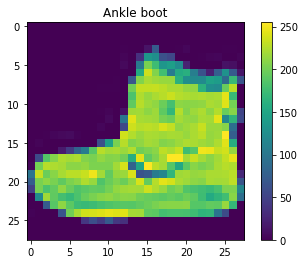

In [23]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.title(class_names[train_lables[0]])
plt.show()

In [0]:
train_images = train_images/255.0
test_images = test_images/255.0

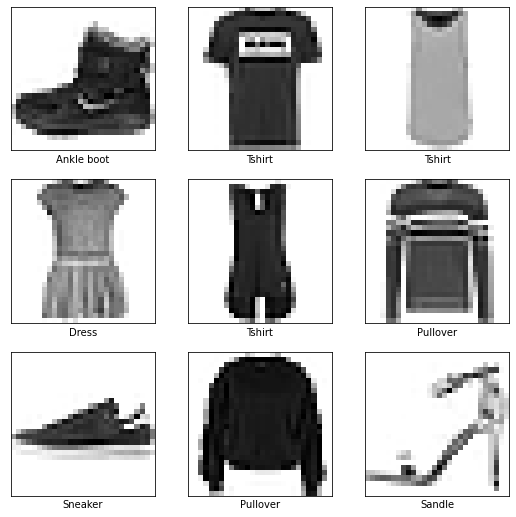

In [26]:
plt.figure(figsize=(9,9))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i],cmap = plt.cm.binary)
  plt.xlabel(class_names[train_lables[i]])
plt.show()  

In [0]:
 train_images = train_images.reshape(60000,28*28)
 test_images = test_images.reshape(10000,28*28)

In [28]:
train_images.shape

(60000, 784)

In [29]:
test_images.shape

(10000, 784)

In [0]:
l0 = tf.keras.layers.Dense(128,activation='relu',input_shape=(784,))
l1 = tf.keras.layers.Dense(10,activation='softmax')

In [32]:
model = tf.keras.models.Sequential([l0,l1])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [34]:
model.fit(train_images,train_lables,epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 62us/sample - loss: 0.5010 - acc: 0.8228
Epoch 2/10
60000/60000 [==============================] - 4s 63us/sample - loss: 0.3739 - acc: 0.8636
Epoch 3/10
60000/60000 [==============================] - 4s 60us/sample - loss: 0.3361 - acc: 0.8783
Epoch 4/10
60000/60000 [==============================] - 4s 59us/sample - loss: 0.3118 - acc: 0.8859
Epoch 5/10
60000/60000 [==============================] - 4s 59us/sample - loss: 0.2931 - acc: 0.8932
Epoch 6/10
60000/60000 [==============================] - 4s 60us/sample - loss: 0.2817 - acc: 0.8969
Epoch 7/10
60000/60000 [==============================] - 4s 60us/sample - loss: 0.2676 - acc: 0.9006
Epoch 8/10
60000/60000 [==============================] - 4s 59us/sample - loss: 0.2561 - acc: 0.9057
Epoch 9/10
60000/60000 [==============================] - 4s 60us/sample - loss: 0.2471 - acc: 0.9083
Epoch 10/10
60000/60000 [==============================] - 

In [35]:
 test_loss,test_acc = model.evaluate(test_images,test_lables)

10000/10000 [==============================] - 0s 30us/sample - loss: 0.3373 - acc: 0.8840


In [36]:
print("test accuracy is ",test_acc)

test accuracy is  0.884
